In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

It is designed here a neural network with 3 layers with 50, 35 and 1 neuron respectively to perform a digit (0 or 1) recognition from mnist dataset.

In [2]:
(X,y),(X_test,y_test)  = tf.keras.datasets.mnist.load_data('mnist.npz')

In [3]:
X = X.reshape(-1,X[0].shape[0]*X[0].shape[1])
X_test = X_test.reshape(-1,X_test[0].shape[0]*X_test[0].shape[1])

In [4]:
iy = np.where((y == 0) | (y == 1))
y = y[iy]
X = X[iy]

iyt = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[iyt]
X_test = X_test[iyt]

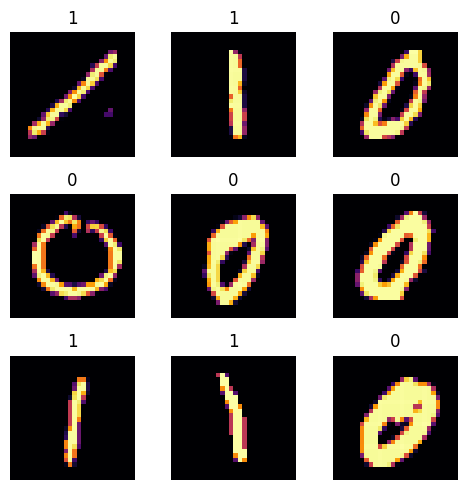

In [5]:
fig,ax = plt.subplots(3,3,figsize=(5,5))

m,n = X.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.randint(m)
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X[k].shape[0]))
        ax[i,j].imshow(X[k].reshape((x,x)), cmap='inferno')
        ax[i,j].set_title(y[k])
        k += 1

plt.tight_layout()
plt.show()

In [6]:
a1 = Dense(units=50, activation='sigmoid')
a2 = Dense(units=35, activation='sigmoid')
a3 = Dense(units=1, activation='sigmoid')

shape_init = tf.keras.Input(shape=(len(X[0]),))

model = Sequential([shape_init,
                    Dense(units=50, activation='sigmoid'),
                    Dense(units=35, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')],
                    name='Binary_Classification'
                    )

In [7]:
model.summary()

Model: "Binary_Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 35)                1785      
                                                                 
 dense_5 (Dense)             (None, 1)                 36        
                                                                 
Total params: 41,071
Trainable params: 41,071
Non-trainable params: 0
_________________________________________________________________


In [8]:
layer1,layer2,layer3 = model.layers

In [9]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(0.0002))

In [10]:
model.fit(X,y,epochs=30)

Epoch 1/30
396/396 [==============================] - 1s 2ms/step - loss: 0.2064
Epoch 2/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0392
Epoch 3/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 4/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0129
Epoch 5/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 6/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 7/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 8/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 9/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 10/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 11/30
396/396 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 12/30
396/396 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 13/30
396/396 [====

In [18]:
prediction = model.predict(X_test[:20])

for i in range(len(prediction)):
    p = prediction[i][0]
    if p < 0.5:
        print(f'Prediction: 0   Actual value: {y_test[i]}')
    else:
        print(f'Prediction: 1   Actual value: {y_test[i]}')

1/1 [==============================] - 0s 29ms/step
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 1   Actual value: 1


In [72]:
y_pred = model.predict(X_test)
y_pred_th = np.zeros(len(y_pred))

for i in range(len(y_pred)):
    p = y_pred[i][0]
    if p < 0.5:
        y_pred_th[i] = 0
    else:
        y_pred_th[i] = 1

67/67 [==============================] - 0s 1ms/step


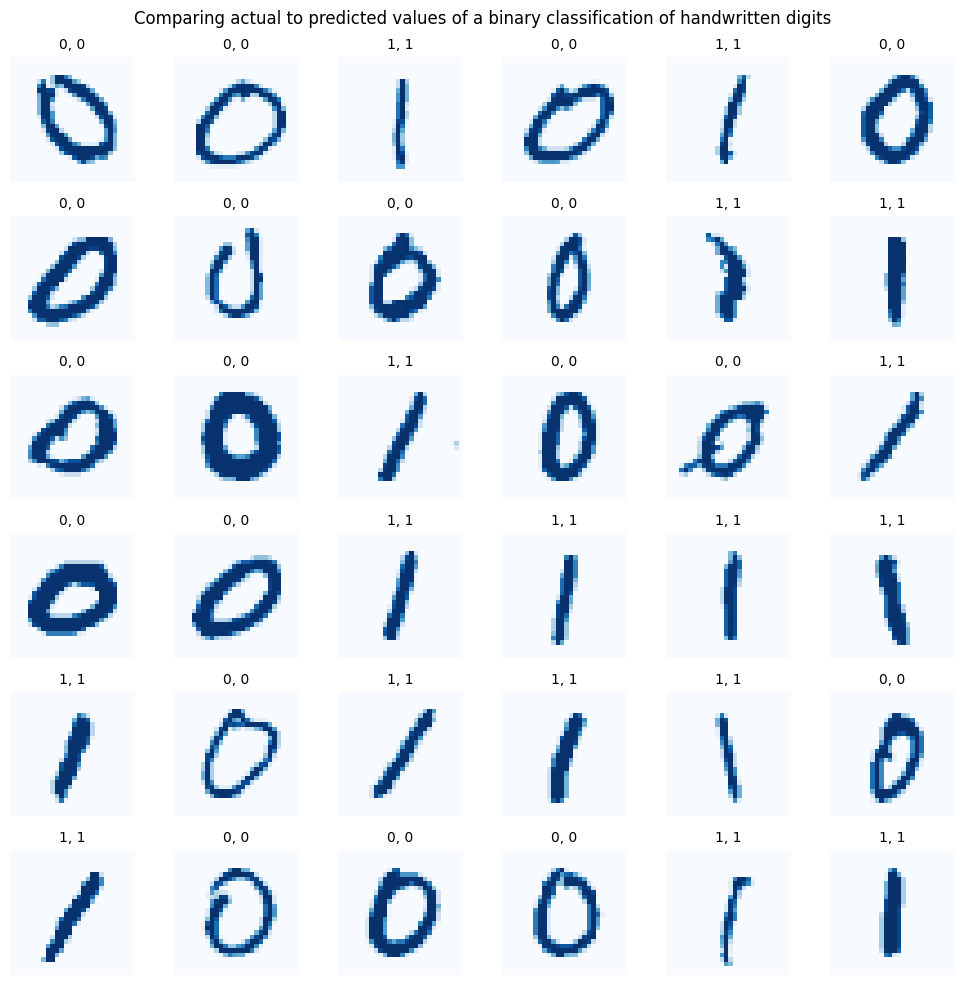

In [73]:
fig,ax = plt.subplots(6,6,figsize=(10,10))

m,n = X_test.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.randint(m)
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X_test[k].shape[0]))
        ax[i,j].imshow(X_test[k].reshape((x,x)), cmap='Blues')
        ax[i,j].set_title(r'%i, %i'%(y_test[k], y_pred_th[k]), fontsize=10)
        k += 1
fig.suptitle('Comparing actual to predicted values of a binary classification of handwritten digits')
plt.tight_layout()
plt.show()

Only 1 element(s) were different in the entire prediction. The element is 2031. Let us plot:


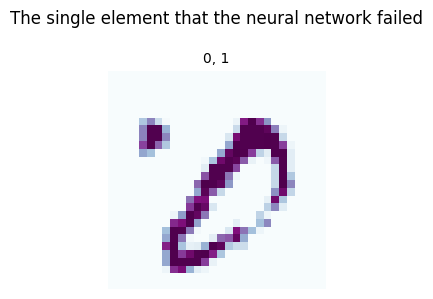

The 'probability' of being a 1 in the prediction was 58.8367%.


In [84]:
iy_results = np.where(y_test != y_pred_th)

print('Only %i element(s) were different in the entire prediction. The element is %i. Let us plot:'%(len(iy_results),iy_results[0][0]))

fig,ax = plt.subplots(1,1,figsize=(3,3))

k = iy_results[0][0]
ax.set_axis_off()
x = int(np.sqrt(X_test[k].shape[0]))
ax.imshow(X_test[k].reshape((x,x)), cmap='BuPu')
ax.set_title(r'%i, %i'%(y_test[k], y_pred_th[k]), fontsize=10)
fig.suptitle('The single element that the neural network failed')
plt.tight_layout()
plt.show()

print("The 'probability' of being a 1 in the prediction was %.4f%%."%(y_pred[k]*100))